# KNN 代码(k=1)


In [9]:
import numpy as np
import math
def KNN(X,dataset,y,K=1):
    distances =[]
    size = dataset.shape[0] # 返回dataset的行数
    for i in range(size):
        p = X - dataset[i]
        distance = math.hypot(p[0],p[1])
        distances.append(distance)
        sort_distance = np.array(distances).argsort()
    return y[sort_distance[0]]
data = np.array([[1,1],[0.4,5.2],[-2.8,-1.1],[3.2,1.4],[-1.3,3.2],[-3,3.1]])
y = ['2','1','2','1','1','2']
x1 = [-2.6,6.6]
print(KNN(x1,data,y))
x2 = [1.4,1.6]
print(KNN(x2,data,y))
x3 = [-2.5,1.2]
print(KNN(x3,data,y))

1
2
2


# KNN 代码(k>1)


In [10]:
import operator
import numpy as np
import math
def KNN(X,dataset,y,K=1):
    distances =[]
    size = dataset.shape[0] # 返回dataset的行数
    for i in range(size):
        p = X - dataset[i]
        distance = math.hypot(p[0],p[1])
        distances.append(distance)
        sort_distance = np.array(distances).argsort()
    class_count = {}
    for i in range(K):
        votelabel = y[sort_distance[i]]
        class_count[votelabel] = class_count.get(votelabel,0) + 1
        sort_class_count = sorted(class_count.items(),key=operator.itemgetter(1),reverse=True)
        return sort_class_count[0][0]
data = np.array([[1,1],[0.4,5.2],[-2.8,-1.1],[3.2,1.4],[-1.3,3.2],[-3,3.1]])
y = ['2','1','2','1','1','2']
x1 = [-2.6,6.6]
print(KNN(x1,data,y))
x2 = [1.4,1.6]
print(KNN(x2,data,y))
x3 = [-2.5,1.2]
print(KNN(x3,data,y))

1
2
2


# 这是百度出来的

In [20]:
import operator
import numpy as np
def class_KNN(X,dataset,y,K):
    datasize = dataset.shape[0] # 返回dataset的行数
    diff = np.tile(X,(datasize,1))-dataset  #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    distances = ((diff**2).sum(axis=1))**0.5 # #二维特征相减后平方 sum()所有元素相加，sum(0)列相加，sum(1)行相加  开方
    sort_distance = distances.argsort()  #返回distances中元素从小到大排序后的索引值
    class_count = {}   #定一个记录类别次数的字典
    for i in range(K):
        #取出前k个元素的类别
        votelabel = y[sort_distance[i]] 
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        class_count[votelabel] = class_count.get(votelabel,0) + 1
        #key=operator.itemgetter(1)根据字典的值进行排序
        #key=operator.itemgetter(0)根据字典的键进行排序
        #reverse降序排序字典
        sort_class_count = sorted(class_count.items(),key=operator.itemgetter(1),reverse=True)
        #返回次数最多的类别,即所要分类的类别
        return sort_class_count[0][0]
data = np.array([[1,1],[0.4,5.2],[-2.8,-1.1],[3.2,1.4],[-1.3,3.2],[-3,3.1]])
y = ['2','1','2','1','1','2']
x1 = [-2.6,6.6]
print(class_KNN(x1,data,y,1))
x2 = [1.4,1.6]
print(class_KNN(x2,data,y,1))
x3 = [-2.5,1.2]
print(class_KNN(x3,data,y,1))

1
2
2


# 请简略说明有监督学习和无监督学习有什么区别；



监督学习
定义：根据已有的数据集，知道输入和输出结果之间的关系。根据这种已知的关系，训练得到一个最优的模型。
也就是说，在监督学习中训练数据既有特征(feature)又有标签(label)，
通过训练，让机器可以自己找到特征和标签之间的联系，在面对只有特征没有标签的数据时，可以判断出标签。

无监督学习
定义：我们不知道数据集中数据、特征之间的关系，而是要根据聚类或一定的模型得到数据之间的关系。
也就是说：无监督学习不会给出标签

# 老师的答案：



将样本特征（考卷）与样本标签（标准答案）同时提供给模型的学习方式称为监督学习，一般用于分类，回归等任务；

只提供样本特征（考卷）给模型的学习方式称为无监督学习，一般用于聚类，生成等任务

# 请搜索资料，列出至少6种传统机器学习模型（神经网络不是传统模型哦）；


In [ ]:
传统机器学习平衡了学习结果的有效性与学习模型的可解释性，为解决有限样本的学习问题提供了一种框架，
主要用于有限样本情况下的模式分类、回归分析、概率密度估计等
1、决策树DT（人工客服VIP，面试录用）
2、朴素贝叶斯NB（邮箱垃圾邮件筛选）
3、逻辑回归（客户购买欲望）
   线性回归LR和随机森林区别：随机森林等树算法都是非线性的，而LR是线性的
4、K 近邻（knn）
5、支持向量机svm (svm 是knn的升维)
6、数据聚类（K-means）/ 数据降维（PCA）

# 请简略说明，为什么PR曲线能在正负样本极其不均衡的情况下很好地反映出模型真正地分类效果。

In [ ]:
书面作业第三题，你是根据对公式以及图像理解的角度来阐述的，可是这里更希望你能直观理解一下：
精准率和召回率是既矛盾又统一的两个指标，为了提高精准率，分类器需要尽可能保守，尽量在更“有把握”的时候才把样本归类到正样本；
但是保守的分类器往往会漏掉很多“没有把握”的正样本，导致召回率降低。
因此 PR 曲线它衡量了这样两个矛盾体的整体性，想让 PR 表现好，那么这个模型必须能够精准分类正负样本，也因此对样本的不均衡比较敏感。


In [ ]:
PR曲线反应的是正样本的情况：
精确率=TP/TP+FP （分母为：正样本个数）
召回率=TP/TP+FN （分母为：预测正样本）
当负样本比较多时，即FP 增大，在TP不变的情况下，精确率会下降。

下面是作业时候自己回答的，理解上还是有误的：

200个样本只有2个正样本：
精确率：X/正样本个数 即X/Max（2） 其值会很高
召回率：X/预测正样本  即X/200 ,其值会很低
图形表现为：召回率靠近X轴，精确率无限靠近Y轴，可能是大写的‘L’图形

以下代码为百度出来：PR实现例子

************************************************************************
************************************************************************
************************************************************************
************************************************************************


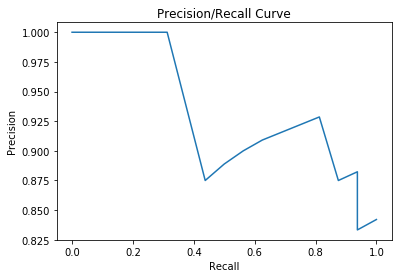

In [7]:
#  ! pip install funcsigs  安装包程序
#coding:utf-8
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from funcsigs import signature
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
#       y_true为样本实际的类别，       y_scores为样本为正例的概率

#y_true = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

y_true = np.array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

y_scores = np.array([0.3, 0.2, 0.3, 0.1, 0.5, 0.36, 0.4, 0.4, 0.4, 0.56, 0.18, 0.27, 0.34, 0.27, 0.33, 0.54, 0.22, 0.5, 0.65, 0.3])

# precision, recall, thresholds  分别为精确率，召回率，阈值
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print('****'*18)
#print(precision)
print('****'*18)
#print(recall)
print('****'*18)
#print(thresholds)
print('****'*18)
plt.plot(recall,precision)
plt.show()
